<h1>Ensemble Learning (Uso de mais de um classificador)
<h1>Random Forest: Gera várias árvores de decisão e utiliza as respostas destas árvores para tomar uma decisão

<h3>Ajustando a largura do meu jupyter notebook

In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container {width:90% !important;}</style>"))

<h3>Importando as bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz

c:\users\hik_m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h3>Carregando os dados

In [4]:
credito = pd.read_csv(r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udemy\Formação Cientista de Dados\Machine Learning\Dados\Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


<h3>Segregando variáveis independente ou preditoras da minha variável classe (dependente)

In [5]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

<h3>Transformação de dados

In [6]:
#Verificação das infomrações antes das transformações
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [7]:
#Criando o objeto de transformação
labelencoder = LabelEncoder()

previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [8]:
#Verificação das informações após transformações
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

<h3>Segregando meus dados entre dados de treino e teste

In [17]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

<h3>Criando meu modelo

In [18]:
#Crio meu objeto no qual recebe o algoritmo
floresta = RandomForestClassifier(n_estimators = 100)
#Importante: O parâmetro n_estimator apresenta a quantidade de árvores que o meu modelo irá utilizar para classificar
#se meu cliente é bom ou mal pagador. Assim, se a reposta de 60 árvores de decisão apontam que meu cliente é um bom pagador
#contra 40 árvores de decisão que classificaram o mesmo como mal, o cliente será considerado um bom pagador

#'Fito' meu modelo floresta com os dados de treinamento. 
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

<h3>Previsões

In [19]:
previsoes = floresta.predict(X_teste)

<h3>Matrix de Confusão

In [20]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 38,  48],
       [ 17, 197]], dtype=int64)

c:\users\hik_m\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


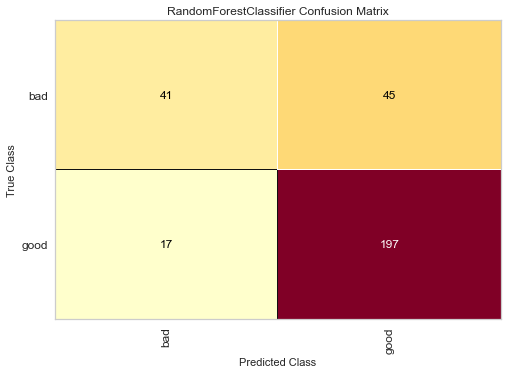

In [21]:
from yellowbrick.classifier import ConfusionMatrix

#Crio meu objeto v de visualização
v = ConfusionMatrix(RandomForestClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

<h3>Verificando taxas de acerto e erro

In [22]:
#Taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7833333333333333

In [23]:
#Taxa de Erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.21666666666666667

<h3>Explorando em detalhes o algoritmo Random Florest

In [24]:
#Apresenta a 100 árvores utilizadas para classificar
floresta.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1493457900),
 DecisionTreeClassifier(max_features='auto', random_state=1651998745),
 DecisionTreeClassifier(max_features='auto', random_state=372807818),
 DecisionTreeClassifier(max_features='auto', random_state=987620035),
 DecisionTreeClassifier(max_features='auto', random_state=1017434531),
 DecisionTreeClassifier(max_features='auto', random_state=1646108063),
 DecisionTreeClassifier(max_features='auto', random_state=2099052976),
 DecisionTreeClassifier(max_features='auto', random_state=280971805),
 DecisionTreeClassifier(max_features='auto', random_state=1437887651),
 DecisionTreeClassifier(max_features='auto', random_state=1004113703),
 DecisionTreeClassifier(max_features='auto', random_state=527835316),
 DecisionTreeClassifier(max_features='auto', random_state=636410106),
 DecisionTreeClassifier(max_features='auto', random_state=1769550205),
 DecisionTreeClassifier(max_features='auto', random_state=2010129646),
 DecisionTr

In [25]:
#Posso ver informações de apenas uma árvore
floresta.estimators_[1] #Estou captando as informações da 2º árvore, no python os índices iniciam-se com o valor 0

DecisionTreeClassifier(max_features='auto', random_state=1651998745)

In [21]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(floresta.estimators_[1], out_file = 'tree_randomForest.dot')
#Entrar no site http://www.webgraphviz.com/ e colar o código gerado no arquivo salvo tree_randomForest.dot